![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo_musical_instruments.ipynb)




# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 4 class Amazon Musical Instruments review classifier training
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>


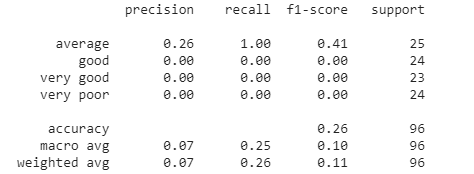

You can achieve these results or even better on this dataset with test data:

<br>

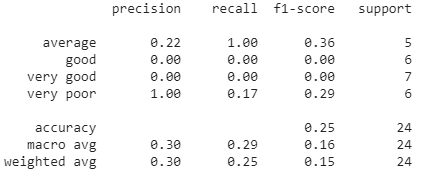


# 1. Install Java 8 and NLU

In [1]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 04:56:20--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 04:56:20 (1.60 MB/s) - written to stdout [1671/1671]



# 2. Download musical instruments  classification dataset

https://www.kaggle.com/eswarchandt/amazon-music-reviews

dataset with products rated between 5 classes

In [2]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/Musical_instruments_reviews.csv

--2021-05-05 04:56:56--  http://ckl-it.de/wp-content/uploads/2021/01/Musical_instruments_reviews.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51708 (50K) [text/csv]
Saving to: ‘Musical_instruments_reviews.csv.1’

Musical_instruments 100%[===================>]  50.50K   220KB/s    in 0.2s    

2021-05-05 04:56:57 (220 KB/s) - ‘Musical_instruments_reviews.csv.1’ saved [51708/51708]



In [3]:
import pandas as pd
test_path = '/content/Musical_instruments_reviews.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
11,very poor,"I know many people love the design, but I find..."
10,good,"Well made. Works as it should. However, seem t..."
45,very good,The product does exactly as it should and is q...
25,average,"This is a fine guitar, but it isn't amazing. ..."
97,average,The problem with this pedal is that you have t...
...,...,...
70,very poor,I might have done something wrong...I read in ...
31,good,Good product at a good price. Have used it mul...
48,average,"Doe's not stay on to well, moves to much even ..."
78,very poor,Go build your own. Build it to your specs and ...


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

By default, the Universal Sentence Encoder Embeddings (USE) are beeing downloaded to provide embeddings for the classifier. You can use any of the 50+ other sentence Emeddings in NLU tough!

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no

trainable_pipe = nlu.load('train.classifier')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50] )


# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document' )
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,trained_classifier,trained_classifier_confidence_confidence,document,text,y,sentence_embedding_use,origin_index
0,"[Very good cable., Well made and it looks grea...",very poor,0.344603,Very good cable. Well made and it looks great ...,Very good cable. Well made and it looks great ...,good,"[0.018388595432043076, -0.001244456390850246, ...",76
1,"[I bought this hoping to use as intended, angl...",very poor,0.532565,"I bought this hoping to use as intended, angle...","I bought this hoping to use as intended, angle...",very poor,"[0.07512206584215164, 0.010702813044190407, -0...",53
2,"[Hosa cable quality can be all over the place,...",good,0.413519,"Hosa cable quality can be all over the place, ...","Hosa cable quality can be all over the place, ...",good,"[0.05411579832434654, 0.04756820946931839, -0....",112
3,"[wanted it just on looks alone., ., ., It is a...",good,0.350552,wanted it just on looks alone...It is a nice l...,wanted it just on looks alone...It is a nice l...,very good,"[0.08269041031599045, 0.02812184765934944, -0....",79
4,"[Well made., Works as it should., However, see...",good,0.453055,"Well made. Works as it should. However, seem t...","Well made. Works as it should. However, seem t...",good,"[0.07170691341161728, -0.012493303045630455, -...",10
5,"[Nice solid cables, with excellent support at ...",good,0.435087,"Nice solid cables, with excellent support at t...","Nice solid cables, with excellent support at t...",very good,"[0.06005071476101875, 0.0279176477342844, -0.0...",20
6,[If you are not use to using a large sustainin...,average,0.627601,If you are not use to using a large sustaining...,If you are not use to using a large sustaining...,average,"[0.06641201674938202, 0.07415173947811127, -0....",83
7,[The Hosa XLR cables are affordable and very h...,good,0.451387,The Hosa XLR cables are affordable and very he...,The Hosa XLR cables are affordable and very he...,good,"[0.0650528222322464, -0.024019034579396248, -0...",117
8,"[Not much to write about here, but it does exa...",good,0.375702,"Not much to write about here, but it does exac...","Not much to write about here, but it does exac...",very good,"[0.06030378118157387, 0.03140004724264145, -0....",89
9,[The primary job of this device is to block th...,average,0.445224,The primary job of this device is to block the...,The primary job of this device is to block the...,very good,"[0.0768439993262291, 0.012965132482349873, -0....",116


# 4. Evaluate the model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_classifier']))

              precision    recall  f1-score   support

     average       0.58      1.00      0.73        15
        good       0.50      0.62      0.55        13
   very good       0.00      0.00      0.00        10
   very poor       0.75      0.50      0.60        12

    accuracy                           0.58        50
   macro avg       0.46      0.53      0.47        50
weighted avg       0.48      0.58      0.51        50



# 5. Lets try different Sentence Emebddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
# Load pipe with bert embeds
# using large embeddings can take a few hours..
# fitted_pipe = nlu.load('en.embed_sentence.bert_large_uncased train.classifier').fit(train_df)
fitted_pipe = nlu.load('en.embed_sentence.bert train.classifier').fit(train_df.iloc[:100])


# predict with the trained pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_classifier']))


sent_bert_base_uncased download started this may take some time.
Approximate size to download 392.5 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.00      0.00      0.00        23
        good       0.00      0.00      0.00        25
   very good       0.00      0.00      0.00        22
   very poor       0.27      1.00      0.43        26

    accuracy                           0.27        96
   macro avg       0.07      0.25      0.11        96
weighted avg       0.07      0.27      0.12        96



In [ ]:
# Load pipe with bert embeds
fitted_pipe = nlu.load('embed_sentence.bert train.classifier').fit(train_df.iloc[:100])

# predict with the trained pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_classifier']))


sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.24      1.00      0.39        23
        good       0.00      0.00      0.00        25
   very good       0.00      0.00      0.00        22
   very poor       0.00      0.00      0.00        26

    accuracy                           0.24        96
   macro avg       0.06      0.25      0.10        96
weighted avg       0.06      0.24      0.09        96



In [4]:
from sklearn.metrics import classification_report
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['classifier_dl'].setMaxEpochs(90)  
trainable_pipe['classifier_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_classifier']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.26      1.00      0.41        25
        good       0.00      0.00      0.00        24
   very good       0.00      0.00      0.00        23
   very poor       0.00      0.00      0.00        24

    accuracy                           0.26        96
   macro avg       0.07      0.25      0.10        96
weighted avg       0.07      0.26      0.11        96



#  6. evaluate on Test Data

In [5]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_classifier']))

              precision    recall  f1-score   support

     average       0.22      1.00      0.36         5
        good       0.00      0.00      0.00         6
   very good       0.00      0.00      0.00         7
   very poor       1.00      0.17      0.29         6

    accuracy                           0.25        24
   macro avg       0.30      0.29      0.16        24
weighted avg       0.30      0.25      0.15        24



# 7. Lets save the model

In [7]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./model/classifier_dl_trained


# 8. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [8]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was really good ')
preds

,text,origin_index,sentence_embedding_from_disk,document,from_disk_confidence_confidence,from_disk,sentence
0,It was really good,8589934592,"[[-0.03466350957751274, 0.33072206377983093, 0...",It was really good,[0.53862494],[very poor],[It was really good]


In [9]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                                      | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)                | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setE